In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sn
import math as math
import time
from prettytable import PrettyTable

# DATA READ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: ignored

In [ ]:
cd /content/drive/MyDrive/ENS 491 492/tasks/classification/data/data_march

In [ ]:
df_crab = pd.read_csv("crab_data.txt", sep=";", header=None)
df_crab = df_crab.drop(6,axis=1)
df_crab.columns = ["Event Number","Cloud Number","X position","Y position","Z position","Energy"]

In [ ]:
df_crab

NameError: ignored

In [ ]:
df_albedo_all = pd.read_csv("albedo_data.txt", sep=";", header=None)
df_albedo_all = df_albedo_all.drop(20,axis=1)
df_albedo_all = df_albedo_all.drop(6,axis=1)
df_albedo_all.columns = ["Event Number","Cloud Number","X position","Y position","Z position","Energy",
                   "Particle Type", "Current Volume", "Previous Volume 1", "Previous Volume 2",
                   "Previous Volume 3", "Previous Volume 4", "Process in Current Volume", 
                   "Process in Prev Vol 1", "Process in Prev Vol 2", "Process in Prev Vol 3"
                   "Process in Prev Vol 4", "Vertex Volume", "Vertex Energy", "Current Step Vol" ]      

In [ ]:
df_albedo_all

In [ ]:
df_albedo = df_albedo_all[["Event Number","Cloud Number","X position","Y position","Z position","Energy"]]

In [ ]:
df_albedo

NameError: ignored

# DATA PREP

## Crab data

In [ ]:
df_copy = df_crab.copy()

In [ ]:
df_copy["xpos_mult_energy"] = df_copy["X position"] * df_copy["Energy"]
df_copy["ypos_mult_energy"] = df_copy["Y position"] * df_copy["Energy"]
df_copy["zpos_mult_energy"] = df_copy["Z position"] * df_copy["Energy"]
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy
0,1,0,21.7369,14.04840,0.002678,0.14664,3.187499,2.060057,0.000393
1,1,1,21.7369,14.04830,0.002701,5.14605,111.859174,72.293254,0.013898
2,1,2,21.7369,14.04840,0.002677,0.03256,0.707753,0.457416,0.000087
3,1,3,21.7369,14.04840,0.002678,0.03317,0.721013,0.465985,0.000089
4,1,4,21.7369,14.04840,0.002678,0.02242,0.487341,0.314965,0.000060
...,...,...,...,...,...,...,...,...,...
785546,40798,11,13.3868,3.13599,4.901200,40.70680,544.933790,127.656118,199.512168
785547,40798,12,13.3866,3.13684,4.901980,0.03677,0.492225,0.115342,0.180246
785548,40798,13,13.3866,3.13684,4.901980,0.03825,0.512037,0.119984,0.187501
785549,40798,14,13.3866,3.13684,4.901980,0.32370,4.333242,1.015395,1.586771


In [ ]:
df_copy['Energy_sum'] = df_copy.groupby('Event Number').Energy.transform(sum)
df_copy['weighted_xpos_sum'] = df_copy.groupby('Event Number').xpos_mult_energy.transform(sum)
df_copy['weighted_ypos_sum'] = df_copy.groupby('Event Number').ypos_mult_energy.transform(sum)
df_copy['weighted_zpos_sum'] = df_copy.groupby('Event Number').zpos_mult_energy.transform(sum)
df_copy['weighted_xpos'] = df_copy['weighted_xpos_sum']/df_copy['Energy_sum']
df_copy['weighted_ypos'] = df_copy['weighted_ypos_sum']/df_copy['Energy_sum']
df_copy['weighted_zpos'] = df_copy['weighted_zpos_sum']/df_copy['Energy_sum']
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,21.7369,14.04840,0.002678,0.14664,3.187499,2.060057,0.000393,10.08505,219.217723,141.678302,0.027089,21.736900,14.048349,0.002686
1,1,1,21.7369,14.04830,0.002701,5.14605,111.859174,72.293254,0.013898,10.08505,219.217723,141.678302,0.027089,21.736900,14.048349,0.002686
2,1,2,21.7369,14.04840,0.002677,0.03256,0.707753,0.457416,0.000087,10.08505,219.217723,141.678302,0.027089,21.736900,14.048349,0.002686
3,1,3,21.7369,14.04840,0.002678,0.03317,0.721013,0.465985,0.000089,10.08505,219.217723,141.678302,0.027089,21.736900,14.048349,0.002686
4,1,4,21.7369,14.04840,0.002678,0.02242,0.487341,0.314965,0.000060,10.08505,219.217723,141.678302,0.027089,21.736900,14.048349,0.002686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785546,40798,11,13.3868,3.13599,4.901200,40.70680,544.933790,127.656118,199.512168,67.41780,905.053839,208.496657,328.179646,13.424553,3.092605,4.867849
785547,40798,12,13.3866,3.13684,4.901980,0.03677,0.492225,0.115342,0.180246,67.41780,905.053839,208.496657,328.179646,13.424553,3.092605,4.867849
785548,40798,13,13.3866,3.13684,4.901980,0.03825,0.512037,0.119984,0.187501,67.41780,905.053839,208.496657,328.179646,13.424553,3.092605,4.867849
785549,40798,14,13.3866,3.13684,4.901980,0.32370,4.333242,1.015395,1.586771,67.41780,905.053839,208.496657,328.179646,13.424553,3.092605,4.867849


In [ ]:
df_crab_clouds = df_copy[["Event Number", "Cloud Number","X position","Y position","Z position","Energy_sum"]]
df_crab_clouds.columns = ["event_num", "cloud_num","xpos","ypos","zpos","energy"]

In [ ]:
df_copy = df_copy[df_copy["Cloud Number"]== 0].reset_index(drop=True)
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,21.73690,14.04840,0.002678,0.14664,3.187499,2.060057,0.000393,10.085050,219.217723,141.678302,0.027089,21.736900,14.048349,0.002686
1,2,0,15.54700,5.98196,0.012038,0.18359,2.854274,1.098228,0.002210,10.169700,158.108941,60.834765,0.122593,15.547060,5.981963,0.012055
2,3,0,16.85020,14.15960,0.019057,0.27763,4.678121,3.931130,0.005291,10.020920,168.854506,141.892219,0.191043,16.850200,14.159600,0.019064
3,4,0,13.11410,9.45086,0.004892,0.10783,1.414093,1.019086,0.000527,10.056120,131.876963,95.039030,0.048972,13.114100,9.450865,0.004870
4,5,0,10.75710,16.91960,0.002716,0.28594,3.075885,4.837990,0.000777,10.149240,109.176911,171.721081,0.027468,10.757151,16.919600,0.002706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40793,40794,0,19.68710,2.58502,1.620060,0.14464,2.847542,0.373897,0.234325,116.434866,2294.742641,290.154831,197.254503,19.708380,2.491993,1.694119
40794,40795,0,20.93740,21.23630,4.084010,0.10774,2.255795,2.287999,0.440011,198.261000,4152.988819,4176.864915,744.011916,20.947079,21.067507,3.752689
40795,40796,0,6.33129,0.97951,1.108780,0.30525,1.932626,0.298995,0.338455,197.170000,1249.892714,192.540633,219.540219,6.339163,0.976521,1.113457
40796,40797,0,17.53920,19.98850,1.235790,0.19640,3.444699,3.925741,0.242709,197.755000,3469.208764,3952.236165,246.312269,17.542964,19.985518,1.245543


In [ ]:
df_crab_weighted = df_copy[["Event Number","weighted_xpos","weighted_ypos","weighted_zpos","Energy_sum"]]
df_crab_weighted.columns = ["event_num","xpos","ypos","zpos","energy"]

In [ ]:
df_crab_first_cloud = df_copy[["Event Number","X position","Y position","Z position","Energy_sum"]]
df_crab_first_cloud.columns = ["event_num","xpos","ypos","zpos","energy"]

In [ ]:
df_crab_weighted

,event_num,xpos,ypos,zpos,energy
0,1,21.736900,14.048349,0.002686,10.085050
1,2,15.547060,5.981963,0.012055,10.169700
2,3,16.850200,14.159600,0.019064,10.020920
3,4,13.114100,9.450865,0.004870,10.056120
4,5,10.757151,16.919600,0.002706,10.149240
...,...,...,...,...,...
40793,40794,19.708380,2.491993,1.694119,116.434866
40794,40795,20.947079,21.067507,3.752689,198.261000
40795,40796,6.339163,0.976521,1.113457,197.170000
40796,40797,17.542964,19.985518,1.245543,197.755000


In [ ]:
df_crab_first_cloud

,event_num,xpos,ypos,zpos,energy
0,1,21.73690,14.04840,0.002678,10.085050
1,2,15.54700,5.98196,0.012038,10.169700
2,3,16.85020,14.15960,0.019057,10.020920
3,4,13.11410,9.45086,0.004892,10.056120
4,5,10.75710,16.91960,0.002716,10.149240
...,...,...,...,...,...
40793,40794,19.68710,2.58502,1.620060,116.434866
40794,40795,20.93740,21.23630,4.084010,198.261000
40795,40796,6.33129,0.97951,1.108780,197.170000
40796,40797,17.53920,19.98850,1.235790,197.755000


In [ ]:
df_crab_clouds

,event_num,cloud_num,xpos,ypos,zpos,energy
0,1,0,21.7369,14.04840,0.002678,10.08505
1,1,1,21.7369,14.04830,0.002701,10.08505
2,1,2,21.7369,14.04840,0.002677,10.08505
3,1,3,21.7369,14.04840,0.002678,10.08505
4,1,4,21.7369,14.04840,0.002678,10.08505
...,...,...,...,...,...,...
785546,40798,11,13.3868,3.13599,4.901200,67.41780
785547,40798,12,13.3866,3.13684,4.901980,67.41780
785548,40798,13,13.3866,3.13684,4.901980,67.41780
785549,40798,14,13.3866,3.13684,4.901980,67.41780


## Albedo Data

In [ ]:
df_copy = df_albedo.copy()

In [ ]:
df_copy["xpos_mult_energy"] = df_copy["X position"] * df_copy["Energy"]
df_copy["ypos_mult_energy"] = df_copy["Y position"] * df_copy["Energy"]
df_copy["zpos_mult_energy"] = df_copy["Z position"] * df_copy["Energy"]
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy
0,1,0,8.08324,15.9917,4.99798,0.23182,1.873857,3.707196,1.158632
1,1,1,8.08323,15.9917,4.99790,8.44356,68.251237,135.026878,42.200069
2,1,2,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474
3,1,3,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474
4,1,4,8.08324,15.9917,4.99798,0.37818,3.056920,6.047741,1.890136
...,...,...,...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,557.01100,5698.389633,14188.128491,2364.561826
7587425,206563,3,13.56710,25.2265,3.81690,878.22600,11914.979965,22154.568189,3352.100819
7587426,206563,4,16.77140,21.8459,3.39856,3342.46000,56057.733644,73019.046914,11359.550858
7587427,206563,5,17.41190,21.5216,3.26552,452.65000,7881.496535,9741.752240,1478.137628


In [ ]:
df_copy['Energy_sum'] = df_copy.groupby('Event Number').Energy.transform(sum)
df_copy['weighted_xpos_sum'] = df_copy.groupby('Event Number').xpos_mult_energy.transform(sum)
df_copy['weighted_ypos_sum'] = df_copy.groupby('Event Number').ypos_mult_energy.transform(sum)
df_copy['weighted_zpos_sum'] = df_copy.groupby('Event Number').zpos_mult_energy.transform(sum)
df_copy['weighted_xpos'] = df_copy['weighted_xpos_sum']/df_copy['Energy_sum']
df_copy['weighted_ypos'] = df_copy['weighted_ypos_sum']/df_copy['Energy_sum']
df_copy['weighted_zpos'] = df_copy['weighted_zpos_sum']/df_copy['Energy_sum']
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,8.08324,15.9917,4.99798,0.23182,1.873857,3.707196,1.158632,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
1,1,1,8.08323,15.9917,4.99790,8.44356,68.251237,135.026878,42.200069,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
2,1,2,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
3,1,3,8.08324,15.9917,4.99798,0.03751,0.303202,0.599849,0.187474,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
4,1,4,8.08324,15.9917,4.99798,0.37818,3.056920,6.047741,1.890136,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,557.01100,5698.389633,14188.128491,2364.561826,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900
7587425,206563,3,13.56710,25.2265,3.81690,878.22600,11914.979965,22154.568189,3352.100819,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900
7587426,206563,4,16.77140,21.8459,3.39856,3342.46000,56057.733644,73019.046914,11359.550858,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900
7587427,206563,5,17.41190,21.5216,3.26552,452.65000,7881.496535,9741.752240,1478.137628,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900


In [ ]:
df_albedo_clouds = df_copy[["Event Number", "Cloud Number","X position","Y position","Z position","Energy_sum"]]
df_albedo_clouds.columns = ["event_num", "cloud_num","xpos","ypos","zpos","energy"]

In [ ]:
df_copy = df_copy[df_copy["Cloud Number"]== 0].reset_index(drop=True)
df_copy

,Event Number,Cloud Number,X position,Y position,Z position,Energy,xpos_mult_energy,ypos_mult_energy,zpos_mult_energy,Energy_sum,weighted_xpos_sum,weighted_ypos_sum,weighted_zpos_sum,weighted_xpos,weighted_ypos,weighted_zpos
0,1,0,8.08324,15.99170,4.99798,0.23182,1.873857,3.707196,1.158632,35.15456,284.164163,562.185061,175.705968,8.083280,15.991810,4.998099
1,2,0,1.63327,11.67270,4.95589,0.14555,0.237722,1.698961,0.721330,53.39540,87.295362,623.190992,264.427971,1.634885,11.671249,4.952261
2,3,0,13.02660,24.34200,4.93733,0.12630,1.645260,3.074395,0.623585,59.81860,775.915262,1454.375822,295.623981,12.971137,24.313104,4.942008
3,4,0,14.70830,19.51040,4.97863,0.14556,2.140940,2.839934,0.724689,60.59620,891.299586,1182.318645,300.738314,14.708836,19.511432,4.962990
4,5,0,14.40510,8.35959,4.83891,0.11008,1.585713,0.920224,0.532667,62.85690,904.290458,527.132412,305.333833,14.386495,8.386230,4.857602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206559,206560,0,18.30980,1.90798,2.62544,554.17600,10146.851725,1057.356724,1454.955837,9729.86010,227700.461223,48691.369959,9226.839936,23.402234,5.004324,0.948301
206560,206561,0,12.37480,3.35205,2.44539,2245.97000,27793.429556,7528.603738,5492.272578,4430.24160,56006.997423,14001.179535,8006.375355,12.641974,3.160365,1.807210
206561,206562,0,11.42890,3.34512,4.08058,1379.94000,15771.196266,4616.064893,5630.955565,6178.61140,72037.463470,47198.958159,11473.133423,11.659167,7.639088,1.856911
206562,206563,0,10.79510,25.49200,4.61529,270.39600,2918.951860,6892.934832,1247.955955,6672.81300,96500.974874,155921.721906,24808.850974,14.461813,23.366715,3.717900


In [ ]:
df_albedo_weighted = df_copy[["Event Number","weighted_xpos","weighted_ypos","weighted_zpos","Energy_sum"]]
df_albedo_weighted.columns = ["event_num","xpos","ypos","zpos","energy"]

In [ ]:
df_albedo_first_cloud = df_copy[["Event Number","X position","Y position","Z position","Energy_sum"]]
df_albedo_first_cloud.columns = ["event_num","xpos","ypos","zpos","energy"]

In [ ]:
df_albedo_weighted

,event_num,xpos,ypos,zpos,energy
0,1,8.083280,15.991810,4.998099,35.15456
1,2,1.634885,11.671249,4.952261,53.39540
2,3,12.971137,24.313104,4.942008,59.81860
3,4,14.708836,19.511432,4.962990,60.59620
4,5,14.386495,8.386230,4.857602,62.85690
...,...,...,...,...,...
206559,206560,23.402234,5.004324,0.948301,9729.86010
206560,206561,12.641974,3.160365,1.807210,4430.24160
206561,206562,11.659167,7.639088,1.856911,6178.61140
206562,206563,14.461813,23.366715,3.717900,6672.81300


In [ ]:
df_albedo_first_cloud

,event_num,xpos,ypos,zpos,energy
0,1,8.08324,15.99170,4.99798,35.15456
1,2,1.63327,11.67270,4.95589,53.39540
2,3,13.02660,24.34200,4.93733,59.81860
3,4,14.70830,19.51040,4.97863,60.59620
4,5,14.40510,8.35959,4.83891,62.85690
...,...,...,...,...,...
206559,206560,18.30980,1.90798,2.62544,9729.86010
206560,206561,12.37480,3.35205,2.44539,4430.24160
206561,206562,11.42890,3.34512,4.08058,6178.61140
206562,206563,10.79510,25.49200,4.61529,6672.81300


In [ ]:
df_albedo_clouds

,event_num,cloud_num,xpos,ypos,zpos,energy
0,1,0,8.08324,15.9917,4.99798,35.15456
1,1,1,8.08323,15.9917,4.99790,35.15456
2,1,2,8.08324,15.9917,4.99798,35.15456
3,1,3,8.08324,15.9917,4.99798,35.15456
4,1,4,8.08324,15.9917,4.99798,35.15456
...,...,...,...,...,...,...
7587424,206563,2,10.23030,25.4719,4.24509,6672.81300
7587425,206563,3,13.56710,25.2265,3.81690,6672.81300
7587426,206563,4,16.77140,21.8459,3.39856,6672.81300
7587427,206563,5,17.41190,21.5216,3.26552,6672.81300


# CLASSIFICATION (with different feature sets)

1: Source Data
0: Background Data

## Train-Test data split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.ensemble import VotingClassifier

In [ ]:
df_crab_weighted = df_crab_weighted[(df_crab_weighted["energy"] >= 45) & (df_crab_weighted["energy"] <= 200)]
df_crab_weighted["Class"] = 1
df_albedo_weighted = df_albedo_weighted[(df_albedo_weighted["energy"] >= 45) & (df_albedo_weighted["energy"] <= 200)]
df_albedo_weighted["Class"] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_crab_weighted

,event_num,xpos,ypos,zpos,energy,Class
29549,29550,22.090089,9.575060,0.123608,45.142600,1
29554,29555,17.316056,11.077050,0.246668,45.155200,1
29559,29560,0.614297,15.157398,0.013933,45.157100,1
29562,29563,17.221630,3.794747,0.126916,45.081700,1
29563,29564,0.193494,3.745273,0.174218,45.061000,1
...,...,...,...,...,...,...
40793,40794,19.708380,2.491993,1.694119,116.434866,1
40794,40795,20.947079,21.067507,3.752689,198.261000,1
40795,40796,6.339163,0.976521,1.113457,197.170000,1
40796,40797,17.542964,19.985518,1.245543,197.755000,1


In [ ]:
df_albedo_weighted = df_albedo_weighted.sample(frac=1).reset_index(drop=True)
df = df_crab_weighted.append(df_albedo_weighted.iloc[0:10176], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df = df.drop('event_num',axis=1)

In [ ]:
df = df[(df["xpos"]>=0) & (df["ypos"]>=0) & (df["zpos"]>=0) & (df["energy"]>=0)]

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy

,xpos,ypos,zpos,energy,Class
0,1.032163,9.305656,0.015738,182.95256,0
1,19.734603,11.837643,2.816370,74.49160,1
2,23.299784,19.120606,0.333214,69.49170,1
3,14.693800,25.362200,1.474880,121.53100,0
4,21.973086,7.653931,0.137985,59.48300,0
...,...,...,...,...,...
20347,8.776560,18.546600,3.306790,140.94600,0
20348,15.217045,3.372570,2.998657,171.73100,0
20349,2.645370,22.850700,4.797690,151.08500,0
20350,23.652862,24.249057,0.355150,73.92650,1


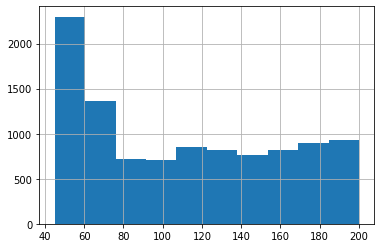

In [ ]:
df_copy[ (df_copy['Class'] == 0)].energy.hist();


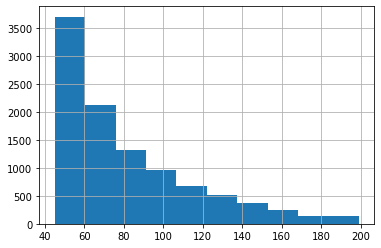

In [ ]:
df_copy[ df_copy['Class'] == 1].energy.hist()

In [ ]:
df_fset1 = df_copy[["xpos","ypos",'Class']]
df_fset2 = df_copy[["xpos","zpos",'Class']]
df_fset3 = df_copy[["xpos","energy",'Class']]
df_fset4 = df_copy[["ypos","zpos",'Class']]
df_fset5 = df_copy[["ypos","energy",'Class']]
df_fset6 = df_copy[["zpos","energy",'Class']]

df_fset7 = df_copy[["xpos",'Class']]
df_fset8 = df_copy[["ypos",'Class']]
df_fset9 = df_copy[["zpos",'Class']]
df_fset10 = df_copy[["energy",'Class']]

df_fset11 = df_copy[["xpos","ypos","zpos",'Class']]
df_fset12 = df_copy[["xpos","ypos","energy",'Class']]
df_fset13 = df_copy[["xpos","zpos","energy",'Class']]
df_fset14 = df_copy[["ypos","zpos","energy",'Class']]



In [ ]:
X_1 = df_fset1.drop('Class', axis=1)
y_1 = df_fset1['Class']

X_2 = df_fset2.drop('Class', axis=1)
y_2 = df_fset2['Class']

X_3 = df_fset3.drop('Class', axis=1)
y_3 = df_fset3['Class']

X_4 = df_fset4.drop('Class', axis=1)
y_4 = df_fset4['Class']

X_5 = df_fset5.drop('Class', axis=1)
y_5 = df_fset5['Class']

X_6 = df_fset6.drop('Class', axis=1)
y_6 = df_fset6['Class']

X_7 = df_fset7.drop('Class', axis=1)
y_7 = df_fset7['Class']

X_8 = df_fset8.drop('Class', axis=1)
y_8 = df_fset8['Class']

X_9 = df_fset9.drop('Class', axis=1)
y_9 = df_fset9['Class']

X_10 = df_fset10.drop('Class', axis=1)
y_10 = df_fset10['Class']

X_11 = df_fset11.drop('Class', axis=1)
y_11 = df_fset11['Class']

X_12 = df_fset12.drop('Class', axis=1)
y_12 = df_fset12['Class']

X_13 = df_fset13.drop('Class', axis=1)
y_13 = df_fset13['Class']

X_14 = df_fset14.drop('Class', axis=1)
y_14 = df_fset14['Class']

X = df_copy.drop('Class', axis=1)
y = df_copy['Class']


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size = 0.2)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size = 0.2)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size = 0.2)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size = 0.2)
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, y_7, test_size = 0.2)
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X_8, y_8, test_size = 0.2)
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_9, y_9, test_size = 0.2)
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size = 0.2)
X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X_11, y_11, test_size = 0.2)
X_train_12, X_test_12, y_train_12, y_test_12 = train_test_split(X_12, y_12, test_size = 0.2)
X_train_13, X_test_13, y_train_13, y_test_13 = train_test_split(X_13, y_13, test_size = 0.2)
X_train_14, X_test_14, y_train_14, y_test_14 = train_test_split(X_14, y_14, test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
X_train_list = [X_train,X_train_1,X_train_2,X_train_3,X_train_4,X_train_5,X_train_6,
                X_train_7,X_train_8,X_train_9,X_train_10,X_train_11,X_train_12,X_train_13,
                X_train_14]

X_test_list = [X_test,X_test_1,X_test_2,X_test_3,X_test_4,X_test_5,X_test_6,
               X_test_7,X_test_8,X_test_9,X_test_10,X_test_11,X_test_12,X_test_13,
               X_test_14]

y_train_list = [y_train,y_train_1,y_train_2,y_train_3,y_train_4,y_train_5,y_train_6,
                y_train_7,y_train_8,y_train_9,y_train_10,y_train_11,y_train_12,y_train_13,
                y_train_14]

y_test_list = [y_test,y_test_1,y_test_2,y_test_3,y_test_4,y_test_5,y_test_6,
               y_test_7,y_test_8,y_test_9,y_test_10,y_test_11,y_test_12,y_test_13,
               y_test_14]

names = ["all features","feature set 1(x,y)","feature set 2(x,z)","feature set 3(z,energy)","feature set 4(y,z)",
         "feature set 5(y,energy)","feature set 6(z,energy)","feature set 7(x)","feature set 8(y)","feature set 9(z)",
         "feature set 10(energy)","feature set 11(x,y,z)","feature set 12(x,y,energy)","feature set 13(x,z,energy)",
         "feature set 14(y,z,energy)"]

## Naive Bayes

In [ ]:
naive_test_score = []
naive_train_score = []

for i in range(len(X_train_list)):

  mnb = MultinomialNB()
  mnb.fit(X_train_list[i], y_train_list[i])

  y_pred = mnb.predict(X_test_list[i])

  #print(classification_report(y_test_list[i],y_pred))

  naive_test_score.append(mnb.score(X_test_list[i], y_test_list[i]))
  naive_train_score.append(mnb.score(X_train_list[i], y_train_list[i]))


In [ ]:
x = PrettyTable(["Models","Train Score","Test Score"])
x.border = True
x.header = True
x.padding_width = 3

for i in range(len(names)):
  x.add_row([names[i], naive_train_score[i],naive_test_score[i]])


print(x)

+--------------------------------+------------------------+-------------------------+
|             Models             |      Train Score       |        Test Score       |
+--------------------------------+------------------------+-------------------------+
|          all features          |   0.6719095600884738   |    0.6746129270090931   |
|       feature set 1(x,y)       |   0.5030720078643401   |    0.5050380928975178   |
|       feature set 2(x,z)       |   0.7158392725485377   |    0.7220447284345048   |
|    feature set 3(z,energy)     |   0.5748341115753256   |    0.583435733595478    |
|       feature set 4(y,z)       |   0.7279429835340379   |    0.7217989678053576   |
|    feature set 5(y,energy)     |    0.59185303514377    |    0.5836814942246252   |
|    feature set 6(z,energy)     |   0.7305849102973704   |    0.7259768985008601   |
|        feature set 7(x)        |   0.5006758417301548   |   0.49815679528139595   |
|        feature set 8(y)        |   0.501781764561317

## Logistic Regression

In [ ]:
lr_test_score = []
lr_train_score = []

for i in range(len(X_train_list)):

  lr = LogisticRegression(max_iter=1000)
  lr.fit(X_train_list[i], y_train_list[i])

  lr_test_score.append(lr.score(X_test_list[i], y_test_list[i]))
  lr_train_score.append(lr.score(X_train_list[i], y_train_list[i]))

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score"])
x.border = True
x.header = True
x.padding_width = 3

for i in range(len(names)):
  x.add_row([names[i], lr_train_score[i],lr_test_score[i]])


print(x)

+--------------------------------+------------------------+-------------------------+
|             Models             |      Train Score       |        Test Score       |
+--------------------------------+------------------------+-------------------------+
|          all features          |   0.7625952322437946   |    0.7648070779061195   |
|       feature set 1(x,y)       |   0.505898255099533    |    0.5079872204472844   |
|       feature set 2(x,z)       |   0.7516588842467437   |    0.7564512165151143   |
|    feature set 3(z,energy)     |   0.642909805849103    |    0.6379945932661588   |
|       feature set 4(y,z)       |   0.7538707299090686   |    0.749078397640698    |
|    feature set 5(y,energy)     |   0.6409437208159253   |    0.6502826247235193   |
|    feature set 6(z,energy)     |   0.7653600393217007   |    0.7586630621774392   |
|        feature set 7(x)        |   0.5055296141558122   |    0.5109363479970509   |
|        feature set 8(y)        |   0.508110100761857

## K-Nearest Neighbours

In [ ]:
knn_test_score = []
knn_train_score = []

for i in range(len(X_train_list)):

  knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
  knn.fit(X_train_list[i], y_train_list[i])

  knn_test_score.append(knn.score(X_test_list[i], y_test_list[i]))
  knn_train_score.append(knn.score(X_train_list[i], y_train_list[i]))

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score"])
x.border = True
x.header = True
x.padding_width = 3

for i in range(len(names)):
  x.add_row([names[i], knn_train_score[i],knn_test_score[i]])


print(x)

+--------------------------------+------------------------+------------------------+
|             Models             |      Train Score       |       Test Score       |
+--------------------------------+------------------------+------------------------+
|          all features          |   0.828459080855247    |   0.7473580732366675   |
|       feature set 1(x,y)       |   0.7187884000983042   |   0.561317276972229    |
|       feature set 2(x,z)       |   0.8076923076923077   |   0.7476038338658147   |
|    feature set 3(z,energy)     |   0.7837306463504546   |   0.6947652985991644   |
|       feature set 4(y,z)       |   0.8084295895797493   |   0.7387564512165151   |
|    feature set 5(y,energy)     |   0.7857581715409191   |   0.6871467190956009   |
|    feature set 6(z,energy)     |   0.8530965839272548   |   0.8053575817154092   |
|        feature set 7(x)        |   0.7052101253379208   |   0.5536986974686655   |
|        feature set 8(y)        |   0.7010321946424183   |   0.5

## Decision Tree

In [ ]:
dtree_test_score = []
dtree_train_score = []

for i in range(len(X_train_list)):

  dtree = DecisionTreeClassifier()
  dtree.fit(X_train_list[i], y_train_list[i])

  dtree_test_score.append(dtree.score(X_test_list[i], y_test_list[i]))
  dtree_train_score.append(dtree.score(X_train_list[i], y_train_list[i]))

In [ ]:
x = PrettyTable(["Models","Train Score","Test Score"])
x.border = True
x.header = True
x.padding_width = 3

for i in range(len(names)):
  x.add_row([names[i], dtree_train_score[i],dtree_test_score[i]])


print(x)

+--------------------------------+------------------------+------------------------+
|             Models             |      Train Score       |       Test Score       |
+--------------------------------+------------------------+------------------------+
|          all features          |          1.0           |   0.7657901204227083   |
|       feature set 1(x,y)       |          1.0           |   0.5512410911771934   |
|       feature set 2(x,z)       |          1.0           |   0.6684689112804129   |
|    feature set 3(z,energy)     |          1.0           |   0.6652740231014992   |
|       feature set 4(y,z)       |          1.0           |   0.6760874907839765   |
|    feature set 5(y,energy)     |          1.0           |   0.6576554435979356   |
|    feature set 6(z,energy)     |          1.0           |   0.7574342590317031   |
|        feature set 7(x)        |   0.9996313590562792   |   0.5364954534283608   |
|        feature set 8(y)        |   0.9996313590562792   |   0.5

## Random Forest

In [ ]:
rf_test_score = []
rf_train_score = []

for i in range(len(X_train_list)):

  clf=RandomForestClassifier(n_estimators=500,max_depth=100)

  clf.fit(X_train_list[i],y_train_list[i])

  y_pred = clf.predict(X_test_list[i])

  rf_test_score.append(clf.score(X_test_list[i], y_test_list[i]))
  rf_train_score.append(clf.score(X_train_list[i], y_train_list[i]))

  print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:
x = PrettyTable(["Models","Train Score","Test Score"])
x.border = True
x.header = True
x.padding_width = 3

for i in range(len(names)):
  x.add_row([names[i], rf_train_score[i],rf_test_score[i]])


print(x)

+--------------------------------+------------------------+------------------------+
|             Models             |      Train Score       |       Test Score       |
+--------------------------------+------------------------+------------------------+
|          all features          |          1.0           |   0.8350946178422217   |
|       feature set 1(x,y)       |          1.0           |   0.5763086753502089   |
|       feature set 2(x,z)       |          1.0           |   0.7471123126075203   |
|    feature set 3(z,energy)     |          1.0           |   0.7122143032686163   |
|       feature set 4(y,z)       |          1.0           |   0.7367903661833374   |
|    feature set 5(y,energy)     |          1.0           |   0.7131973457852052   |
|    feature set 6(z,energy)     |          1.0           |   0.8060948636028509   |
|        feature set 7(x)        |   0.9996313590562792   |   0.5362496927992135   |
|        feature set 8(y)        |   0.9996313590562792   |   0.5

## xG Boost

In [ ]:
xg_test_score = []
xg_train_score = []

for i in range(len(X_train_list)):

  xg = XGBClassifier()
  xg.fit(X_train_list[i],y_train_list[i])

  xg_test_score.append(xg.score(X_test_list[i], y_test_list[i]))
  xg_train_score.append(xg.score(X_train_list[i], y_train_list[i]))

  print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:
x = PrettyTable(["Models","Train Score","Test Score"])
x.border = True
x.header = True
x.padding_width = 3

for i in range(len(names)):
  x.add_row([names[i], xg_train_score[i],xg_test_score[i]])


print(x)

+--------------------------------+------------------------+------------------------+
|             Models             |      Train Score       |       Test Score       |
+--------------------------------+------------------------+------------------------+
|          all features          |   0.8362005406733841   |   0.8311624477758663   |
|       feature set 1(x,y)       |   0.6295772917178668   |   0.6144015728680265   |
|       feature set 2(x,z)       |   0.7740845416564266   |   0.7694765298599164   |
|    feature set 3(z,energy)     |   0.754362251167363    |   0.7510444826738757   |
|       feature set 4(y,z)       |   0.7746375030720078   |   0.7675104448267388   |
|    feature set 5(y,energy)     |   0.7517817645613173   |   0.7579257802899976   |
|    feature set 6(z,energy)     |   0.838105185549275    |   0.8257557139346277   |
|        feature set 7(x)        |   0.5785819611698206   |   0.5785205210125338   |
|        feature set 8(y)        |   0.5822683706070287   |   0.5

# COMPARISON

In [ ]:
from operator import itemgetter

In [ ]:
total = []

for i in range(len(names)):
  sub=[]
  sub.append(names[i])
  sub.append(naive_test_score[i])
  sub.append(naive_train_score[i])

  total.append(sub)

sorted_results = sorted(total, key=itemgetter(1))

list1 = []
for i in sorted_results:
  list1.append(i[0])

list2 = []
for i in sorted_results:
  list2.append(i[1])

list3 = []
for i in sorted_results:
  list3.append(i[2])

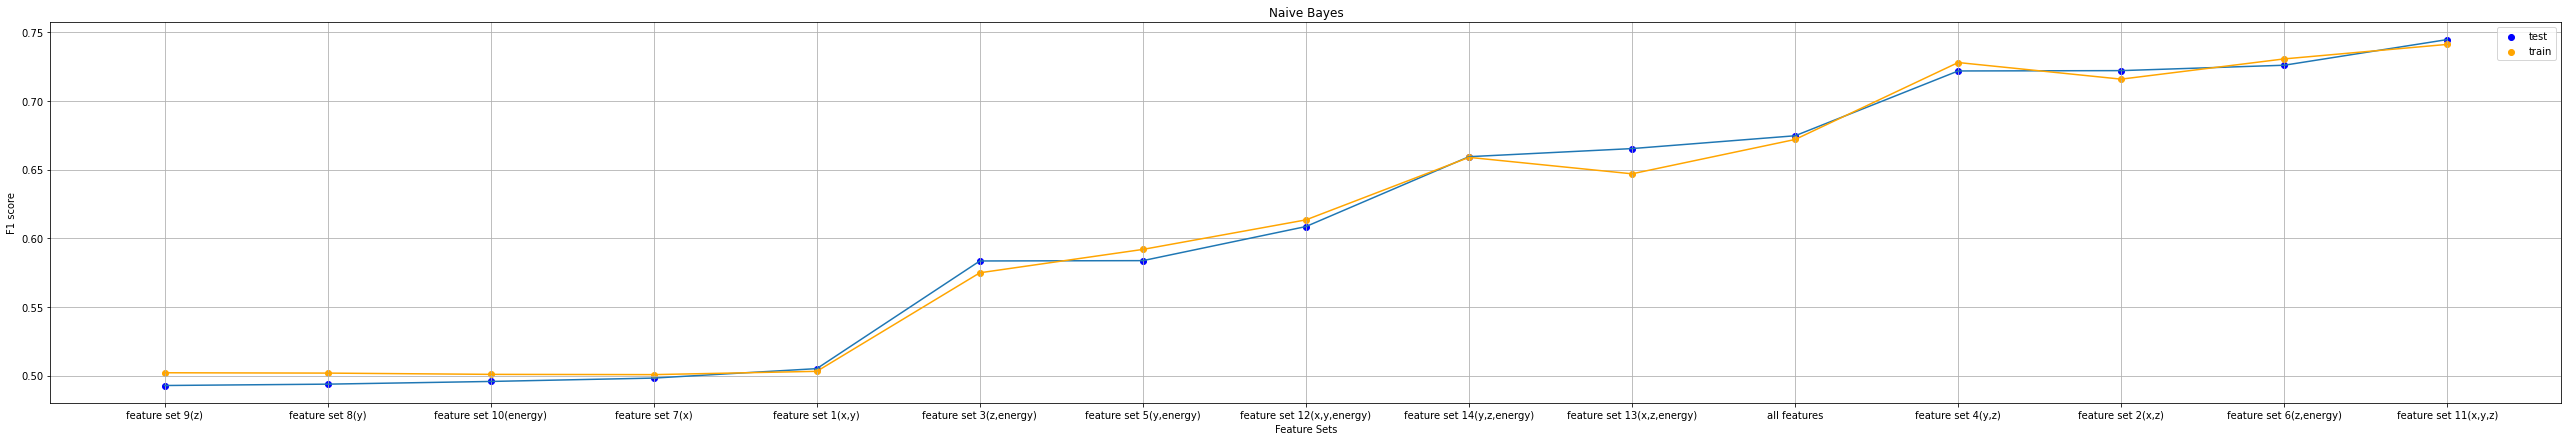

In [ ]:
fig, ax = plt.subplots(figsize=(45, 7))

ax.scatter(list1, list2, color="b",label="test")
ax.plot(list1, list2)

ax.scatter(list1, list3, color="orange",label="train")
ax.plot(list1, list3, color="orange")

plt.title("Naive Bayes")
plt.xlabel("Feature Sets")
plt.ylabel("F1 score")
ax.legend()

ax.grid()
plt.show()

In [ ]:
total = []

for i in range(len(names)):
  sub=[]
  sub.append(names[i])
  sub.append(lr_test_score[i])
  sub.append(lr_train_score[i])

  total.append(sub)

sorted_results = sorted(total, key=itemgetter(1))

list1 = []
for i in sorted_results:
  list1.append(i[0])

list2 = []
for i in sorted_results:
  list2.append(i[1])

list3 = []
for i in sorted_results:
  list3.append(i[2])

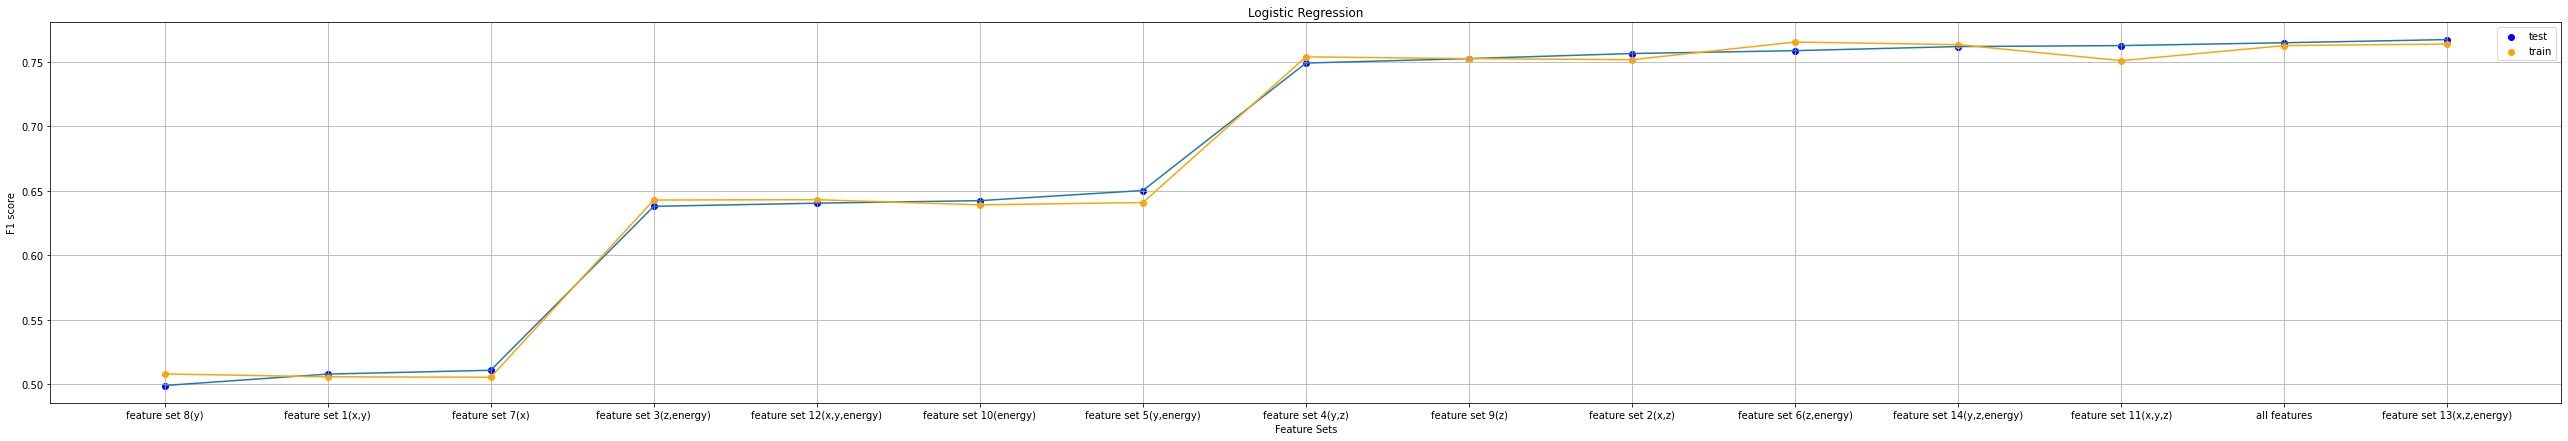

In [ ]:
fig, ax = plt.subplots(figsize=(45, 7))
ax.scatter(list1, list2, color="b",label="test")
ax.plot(list1, list2)

ax.scatter(list1, list3, color="orange",label="train")
ax.plot(list1, list3, color="orange")

plt.title("Logistic Regression")
plt.xlabel("Feature Sets")
plt.ylabel("F1 score")

ax.legend()

ax.grid()
plt.show()

In [ ]:
total = []

for i in range(len(names)):
  sub=[]
  sub.append(names[i])
  sub.append(knn_test_score[i])
  sub.append(knn_train_score[i])

  total.append(sub)

sorted_results = sorted(total, key=itemgetter(1))

list1 = []
for i in sorted_results:
  list1.append(i[0])

list2 = []
for i in sorted_results:
  list2.append(i[1])

list3 = []
for i in sorted_results:
  list3.append(i[2])

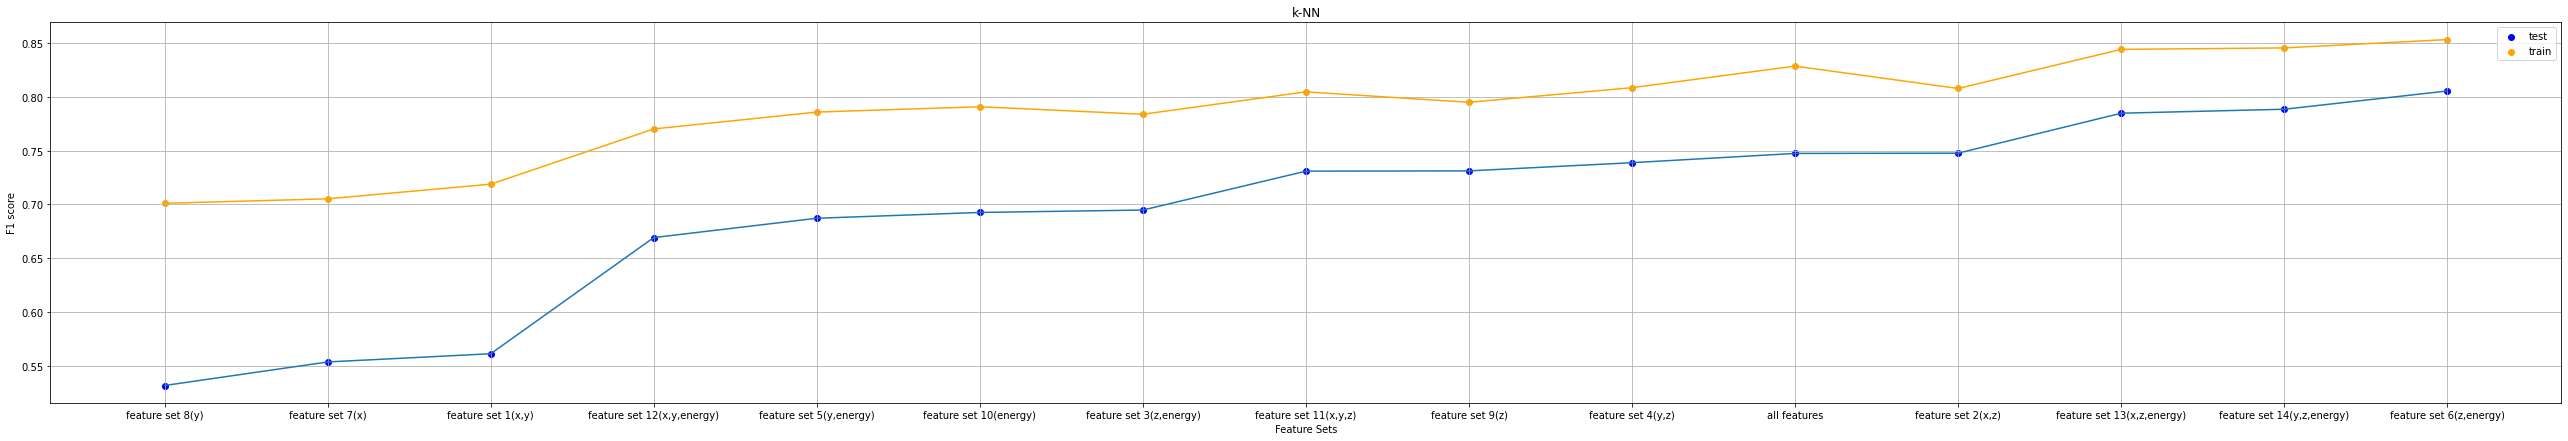

In [ ]:
fig, ax = plt.subplots(figsize=(45, 7))

ax.scatter(list1, list2, color="b",label="test")
ax.plot(list1, list2)

ax.scatter(list1, list3, color="orange",label="train")
ax.plot(list1, list3, color="orange")

plt.title("k-NN")
plt.xlabel("Feature Sets")
plt.ylabel("F1 score")

ax.legend()

ax.grid()
plt.show()

In [ ]:
total = []

for i in range(len(names)):
  sub=[]
  sub.append(names[i])
  sub.append(dtree_test_score[i])
  sub.append(dtree_train_score[i])

  total.append(sub)

sorted_results = sorted(total, key=itemgetter(1))

list1 = []
for i in sorted_results:
  list1.append(i[0])

list2 = []
for i in sorted_results:
  list2.append(i[1])

list3 = []
for i in sorted_results:
  list3.append(i[2])

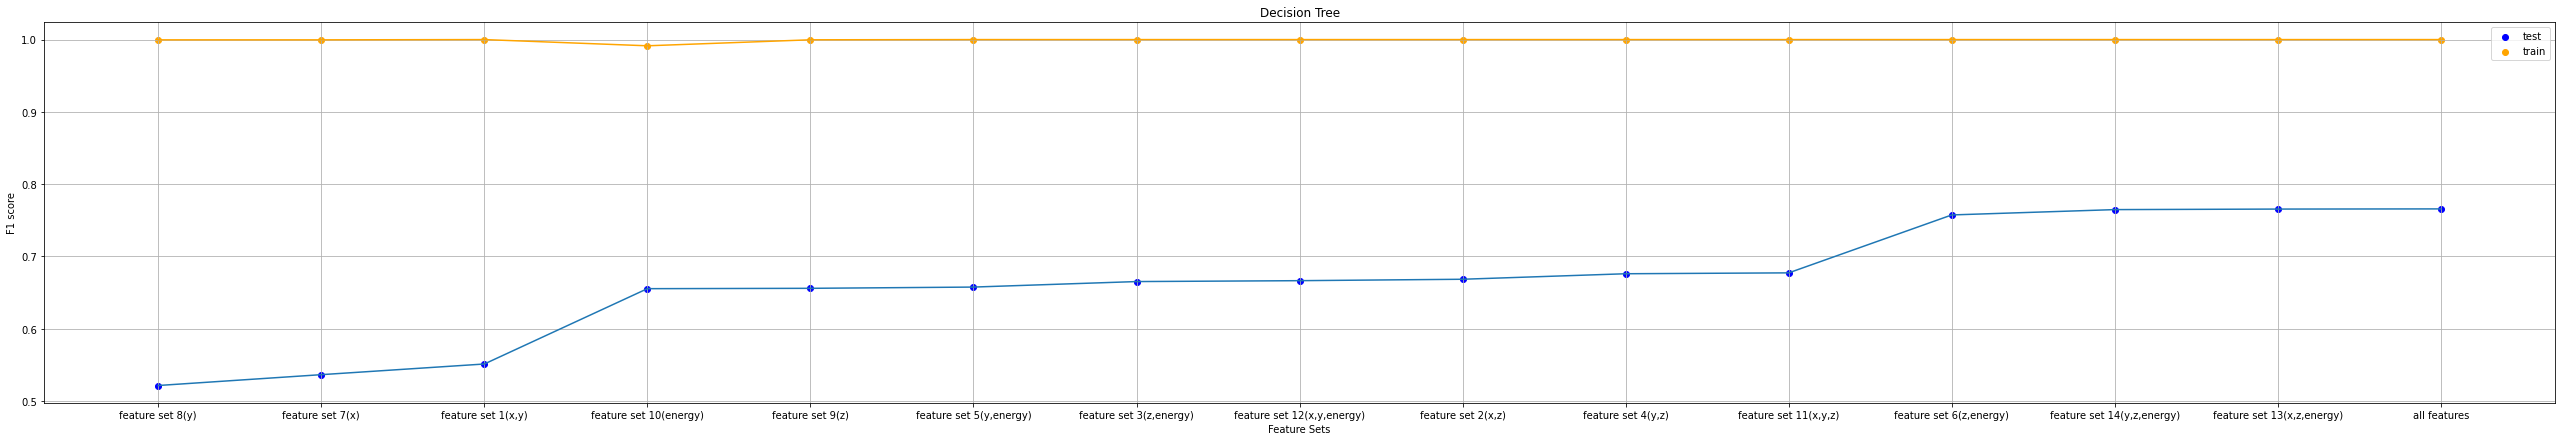

In [ ]:
fig, ax = plt.subplots(figsize=(45, 7))

ax.scatter(list1, list2, color="b",label="test")
ax.plot(list1, list2)

ax.scatter(list1, list3, color="orange",label="train")
ax.plot(list1, list3, color="orange")

plt.title("Decision Tree")
plt.xlabel("Feature Sets")
plt.ylabel("F1 score")

ax.legend()


ax.grid()
plt.show()

In [ ]:
total = []

for i in range(len(names)):
  sub=[]
  sub.append(names[i])
  sub.append(rf_test_score[i])
  sub.append(rf_train_score[i])

  total.append(sub)

sorted_results = sorted(total, key=itemgetter(1))

list1 = []
for i in sorted_results:
  list1.append(i[0])

list2 = []
for i in sorted_results:
  list2.append(i[1])

list3 = []
for i in sorted_results:
  list3.append(i[2])

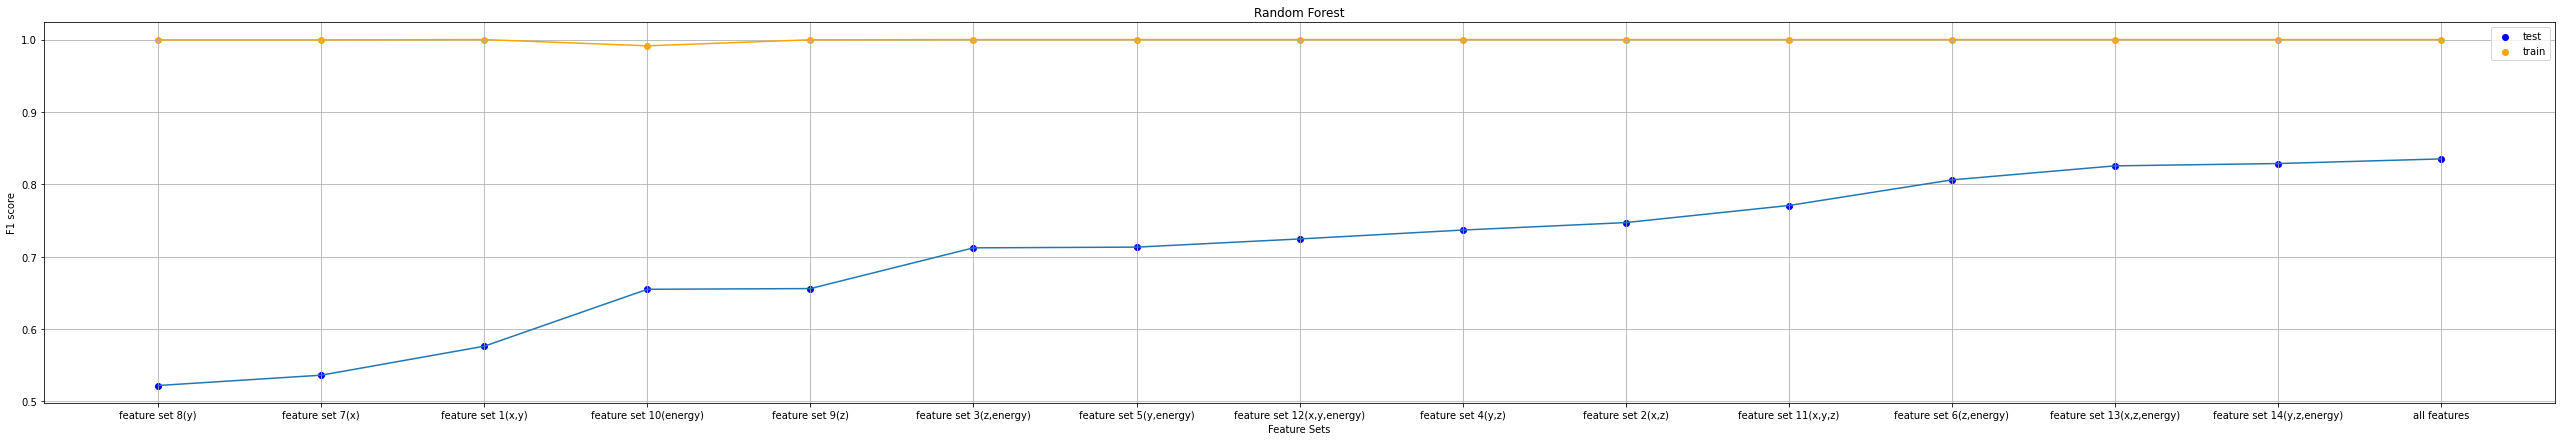

In [ ]:
fig, ax = plt.subplots(figsize=(45, 7))

ax.scatter(list1, list2, color="b",label="test")
ax.plot(list1, list2)

ax.scatter(list1, list3, color="orange",label="train")
ax.plot(list1, list3, color="orange")

plt.title("Random Forest")
plt.xlabel("Feature Sets")
plt.ylabel("F1 score")

ax.legend()

ax.grid()
plt.show()

In [ ]:
total = []

for i in range(len(names)):
  sub=[]
  sub.append(names[i])
  sub.append(xg_test_score[i])
  sub.append(xg_train_score[i])

  total.append(sub)

sorted_results = sorted(total, key=itemgetter(1))

list1 = []
for i in sorted_results:
  list1.append(i[0])

list2 = []
for i in sorted_results:
  list2.append(i[1])

list3 = []
for i in sorted_results:
  list3.append(i[2])

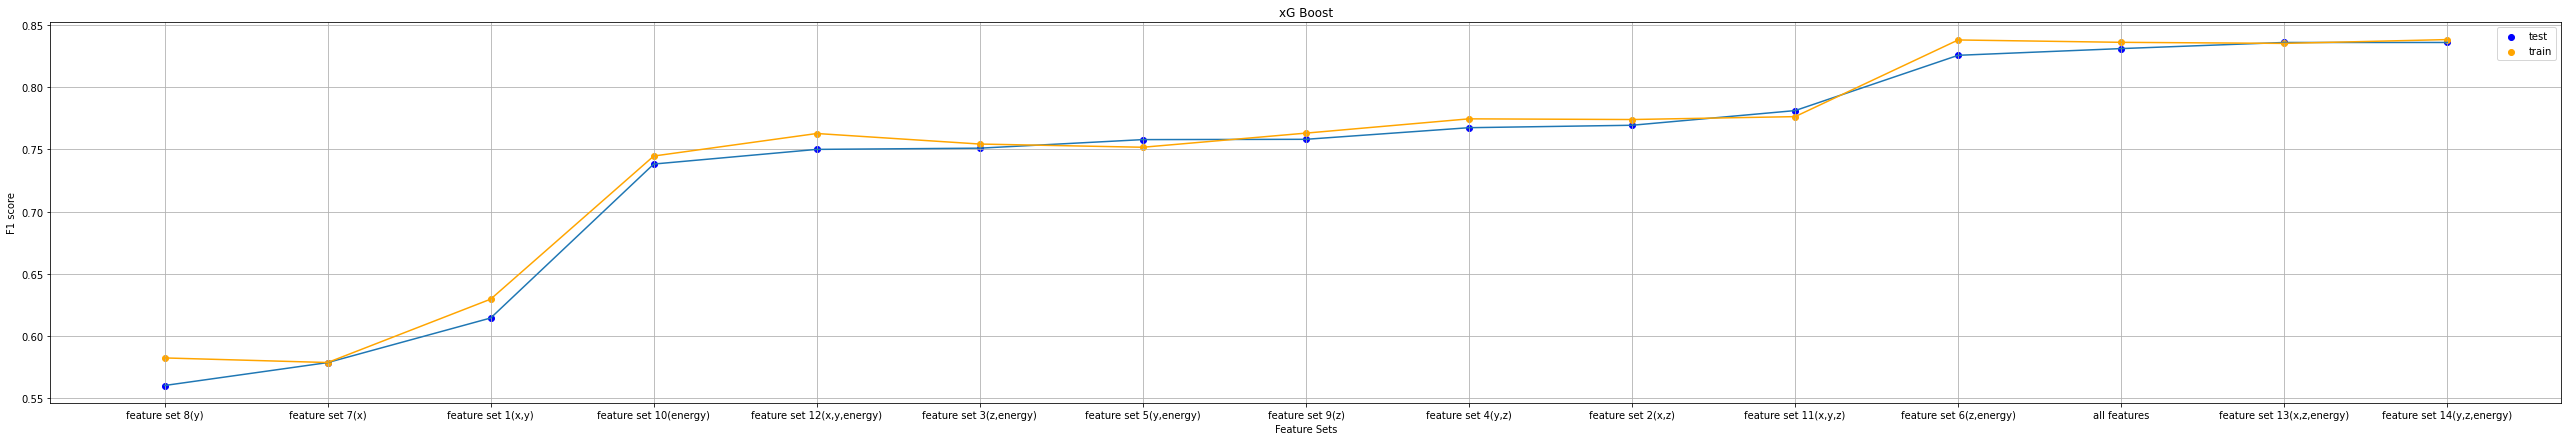

In [ ]:
fig, ax = plt.subplots(figsize=(45, 7))

ax.scatter(list1, list2, color="b",label="test")
ax.plot(list1, list2)

ax.scatter(list1, list3, color="orange",label="train")
ax.plot(list1, list3, color="orange")

plt.title("xG Boost")
plt.xlabel("Feature Sets")
plt.ylabel("F1 score")

ax.legend()

ax.grid()
plt.show()

## Total Comparison

In [ ]:
test_score_all = [naive_test_score[0],lr_test_score[0],knn_test_score[0],dtree_test_score[0],rf_test_score[0],xg_test_score[0]] 
test_score_f1 = [naive_test_score[1],lr_test_score[1],knn_test_score[1],dtree_test_score[1],rf_test_score[1],xg_test_score[1]] 
test_score_f2 = [naive_test_score[2],lr_test_score[2],knn_test_score[2],dtree_test_score[2],rf_test_score[2],xg_test_score[2]] 
test_score_f3 = [naive_test_score[3],lr_test_score[0],knn_test_score[3],dtree_test_score[3],rf_test_score[3],xg_test_score[3]] 
test_score_f4 = [naive_test_score[4],lr_test_score[4],knn_test_score[4],dtree_test_score[4],rf_test_score[4],xg_test_score[4]] 
test_score_f5 = [naive_test_score[5],lr_test_score[5],knn_test_score[5],dtree_test_score[5],rf_test_score[5],xg_test_score[5]] 
test_score_f6 = [naive_test_score[6],lr_test_score[6],knn_test_score[6],dtree_test_score[6],rf_test_score[6],xg_test_score[6]] 

names = ["Naive Bayes", "Logistic Reg.","k-NN","Decision Tree","Random Forest","xG Boost"]


In [ ]:
test_score_all

[0.6746129270090931,
 0.7648070779061195,
 0.7473580732366675,
 0.7657901204227083,
 0.8350946178422217,
 0.8311624477758663]

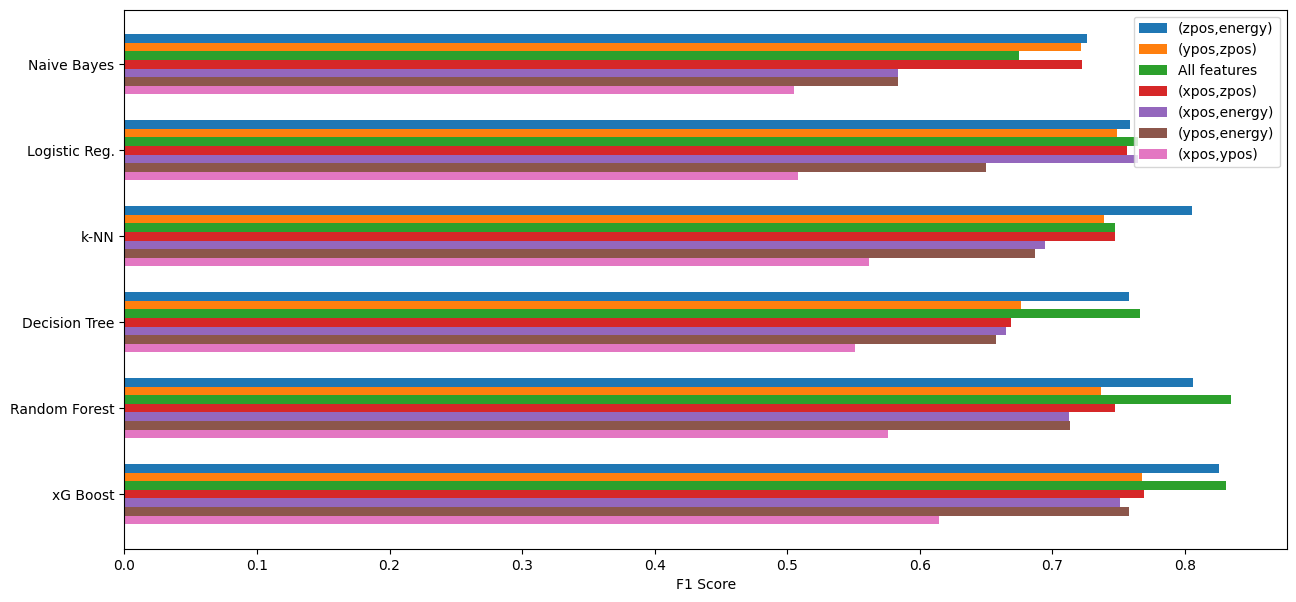

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 7))

y_pos = np.arange(len(names))

y_pos = y_pos*2

ax.barh(y_pos-0.6, test_score_f6, 0.2, label = '(zpos,energy)')
ax.barh(y_pos-0.4, test_score_f4, 0.2, label = '(ypos,zpos)')
ax.barh(y_pos-0.2, test_score_all, 0.2, label = 'All features')
ax.barh(y_pos, test_score_f2, 0.2, label = '(xpos,zpos)')
ax.barh(y_pos+0.2, test_score_f3, 0.2, label = '(xpos,energy)')
ax.barh(y_pos+0.4, test_score_f5, 0.2, label = '(ypos,energy)')
ax.barh(y_pos+0.6, test_score_f1, 0.2, label = '(xpos,ypos)')



ax.set_yticks(y_pos)
ax.set_yticklabels( names)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('F1 Score')

plt.legend()
plt.show()

# Correlation check

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [ ]:
corr, _ = pearsonr(df_copy.xpos, df_copy.Class)
print('Pearsons correlation of xpos & label: %.3f' % corr)

corr, _ = spearmanr(df_copy.xpos, df_copy.Class)
print('Spearmans correlation of xpos & label: %.3f' % corr)

Pearsons correlation of xpos & label: -0.008
Spearmans correlation of xpos & label: -0.008


In [ ]:
corr, _ = pearsonr(df_copy.ypos, df_copy.Class)
print('Pearsons correlation of ypos & label: %.3f' % corr)

corr, _ = spearmanr(df_copy.ypos, df_copy.Class)
print('Spearmans correlation of ypos & label: %.3f' % corr)

Pearsons correlation of ypos & label: 0.014
Spearmans correlation of ypos & label: 0.014


In [ ]:
corr, _ = pearsonr(df_copy.zpos, df_copy.Class)
print('Pearsons correlation of zpos & label: %.3f' % corr)

corr, _ = spearmanr(df_copy.zpos, df_copy.Class)
print('Spearmans correlation of zpos & label: %.3f' % corr)

Pearsons correlation of zpos & label: -0.532
Spearmans correlation of zpos & label: -0.505


In [ ]:
corr, _ = pearsonr(df_copy.energy, df_copy.Class)
print('Pearsons correlation of energy & label: %.3f' % corr)

corr, _ = spearmanr(df_copy.energy, df_copy.Class)
print('Spearmans correlation of energy & label: %.3f' % corr)

Pearsons correlation of energy & label: -0.347
Spearmans correlation of energy & label: -0.333


In [ ]:
corr, _ = pearsonr(df_copy.xpos, df_copy.ypos)
print('Pearsons correlation of xpos & ypos: %.3f' % corr)

corr, _ = spearmanr(df_copy.xpos, df_copy.ypos)
print('Spearmans correlation of xpos & ypos: %.3f' % corr)

Pearsons correlation of xpos & ypos: -0.001
Spearmans correlation of xpos & ypos: -0.001


In [ ]:
corr, _ = pearsonr(df_copy.xpos, df_copy.zpos)
print('Pearsons correlation of xpos & zpos: %.3f' % corr)

corr, _ = spearmanr(df_copy.xpos, df_copy.zpos)
print('Spearmans correlation of xpos & zpos: %.3f' % corr)

Pearsons correlation of xpos & zpos: 0.014
Spearmans correlation of xpos & zpos: 0.016


In [ ]:
corr, _ = pearsonr(df_copy.ypos, df_copy.zpos)
print('Pearsons correlation of ypos & zpos: %.3f' % corr)

corr, _ = spearmanr(df_copy.ypos, df_copy.zpos)
print('Spearmans correlation of ypos & zpos: %.3f' % corr)

Pearsons correlation of ypos & zpos: -0.011
Spearmans correlation of ypos & zpos: -0.012


In [ ]:
corr, _ = pearsonr(df_copy.xpos, df_copy.energy)
print('Pearsons correlation of xpos & energy: %.3f' % corr)

corr, _ = spearmanr(df_copy.xpos, df_copy.energy)
print('Spearmans correlation of xpos & energy: %.3f' % corr)

Pearsons correlation of xpos & energy: 0.008
Spearmans correlation of xpos & energy: 0.007


In [ ]:
corr, _ = pearsonr(df_copy.ypos, df_copy.energy)
print('Pearsons correlation of ypos & energy: %.3f' % corr)

corr, _ = spearmanr(df_copy.ypos, df_copy.energy)
print('Spearmans correlation of ypos & energy: %.3f' % corr)

Pearsons correlation of ypos & energy: -0.001
Spearmans correlation of ypos & energy: 0.000


In [ ]:
corr, _ = pearsonr(df_copy.zpos, df_copy.energy)
print('Pearsons correlation of zpos & energy: %.3f' % corr)

corr, _ = spearmanr(df_copy.zpos, df_copy.energy)
print('Spearmans correlation of zpos & energy: %.3f' % corr)

Pearsons correlation of zpos & energy: 0.309
Spearmans correlation of zpos & energy: 0.397


In [ ]:
print("For Background (albedo) data:")

corr, _ = pearsonr(df_copy[df_copy.Class == 0].zpos, df_copy[df_copy.Class == 0].energy)
print('Pearsons correlation of zpos & energy: %.3f' % corr)

corr, _ = spearmanr(df_copy[df_copy.Class == 0].zpos, df_copy[df_copy.Class == 0].energy)
print('Spearmans correlation of zpos & energy: %.3f' % corr)

For Background (albedo) data:
Pearsons correlation of zpos & energy: 0.004
Spearmans correlation of zpos & energy: -0.007


In [ ]:
print("For Source (crab) data:")

corr, _ = pearsonr(df_copy[df_copy.Class == 1].zpos, df_copy[df_copy.Class == 1].energy)
print('Pearsons correlation of zpos & energy: %.3f' % corr)

corr, _ = spearmanr(df_copy[df_copy.Class == 1].zpos, df_copy[df_copy.Class == 1].energy)
print('Spearmans correlation of zpos & energy: %.3f' % corr)

For Source (crab) data:
Pearsons correlation of zpos & energy: 0.504
Spearmans correlation of zpos & energy: 0.592


In [ ]:
plt.subplots(figsize=(12,5))
gender_correlation=df.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)